CLUSTER ANALYSIS

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


df = 

df.head()

from sklearn.cluster import KMeans
model = Kmeans(n_clusters = 2, random_state = 42)


PLAN:   
1. выборка
2. очистка и графики, xtrain - xtest
3. нормализация
4. выбор метода классификации и измерения расстояний
5. sklearn
6. hierarchy or kmeans 
7. numbers of clusters
8. fit
9. визуализация и РСА


In [337]:
data = pd.read_csv('wine-clustering.csv')

1. ВЫБОРКА ПО ВИНУ, 13 пунктиков для классов

In [268]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


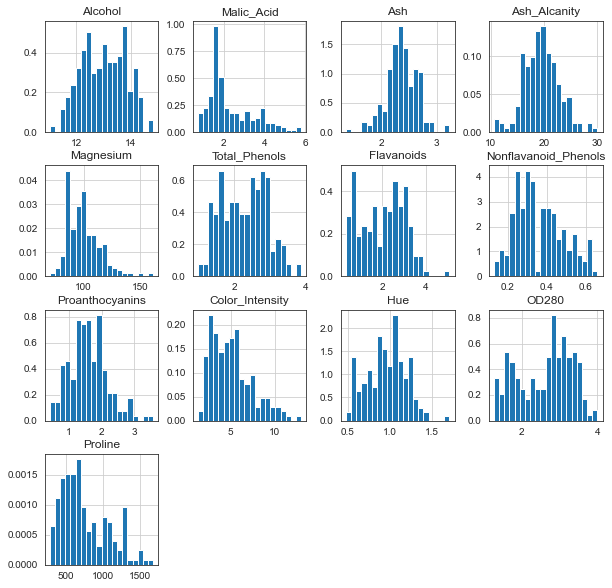

In [269]:
ax = data.hist(figsize = (10, 10), density = True, bins = 20)


array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic_Acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Ash_Alcanity'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total_Phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid_Phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color_Intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280'}>],
       [<AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

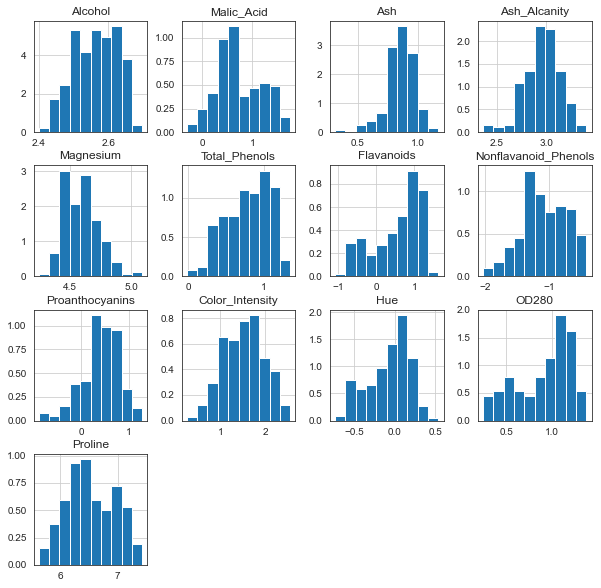

In [59]:
log_d = np.log(data)
log_d.hist(figsize = (10, 10), density = True) #данные без особых выбросов, но залогим их просто чтобы глянуть

<function matplotlib.pyplot.show(close=None, block=None)>

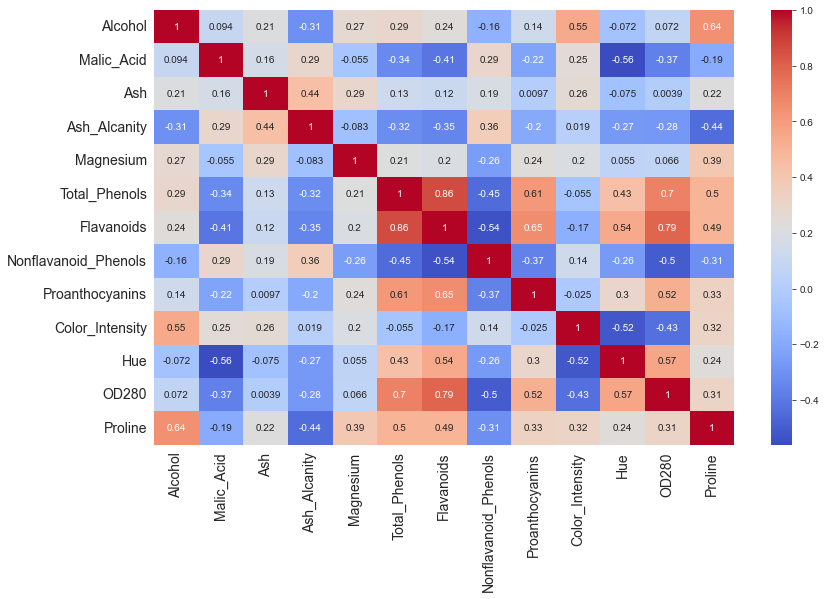

In [56]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm" )
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show


3.СДЕЛАЕМ CТАНДАРТИЗАЦИЮ ЧЕРЕЗ SKLEARN

In [270]:
from sklearn.preprocessing import StandardScaler

In [319]:
scaler = StandardScaler().fit(data) #cоздали стандартизацию 


In [320]:
scaler.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02, 1.07865169e+00])

In [321]:
data_scaled = scaler.transform(data) #применили к данным

In [322]:
data_scaled.mean(axis = 0)
data_scaled.std(axis = 0) #проверка

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

КЛАСТЕРИЗАЦИЯ

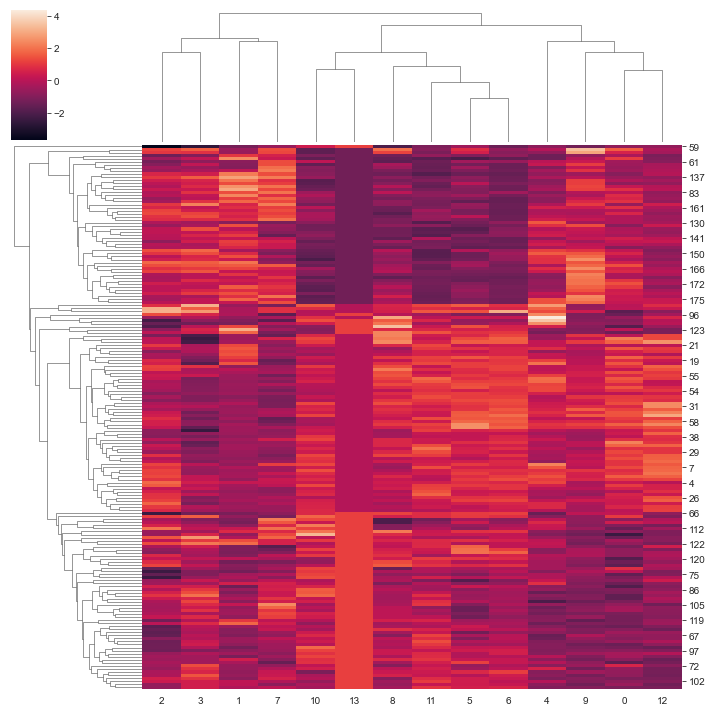

In [331]:
g = sns.clustermap(data_scaled)  # можно глянуть дендорамму


In [275]:
from sklearn.cluster import KMeans

In [295]:
clust = KMeans(n_clusters = 3, random_state = 42, n_init = 20)

In [96]:
clust #paremetrs

KMeans(n_clusters=3, n_init=12, random_state=0)

In [296]:
clust.fit(data_scaled)

KMeans(n_clusters=3, n_init=20, random_state=42)

In [330]:
clust.labels_ #промежуточная классификация

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Построим с локтем

In [298]:
K = range(1, 11)
clusts = [KMeans(n_clusters = K, random_state = 0, n_init = 20).fit(data_scaled) for K in range(1, 11)]

In [299]:
lokot = [i.inertia_ for i in clusts]

In [300]:
centroids = clust.cluster_centers_ #для выделения центроидов

Text(0.5, 1.0, 'The elbow method for KMEANS')

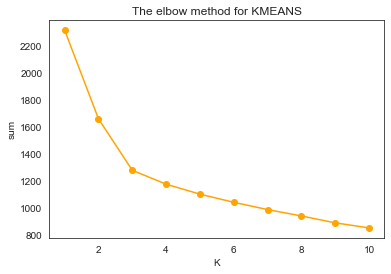

In [301]:
plt.plot(K, lokot, marker = 'o', color = 'orange')
plt.xlabel('K')
plt.ylabel('sum')
plt.title('The elbow method for KMEANS')

СУДЯ ПО ГРАФИКУ: 3 кластера лучший вариант. Если есть необходимость нужно пересчитать модель выше, если нет, то можно визуализировать

In [302]:
#cтатистика по группам добавляем колонку с кластерами в таблицу, это предварительная классификация
data['clusters'] = clust.labels_

In [332]:
data.groupby('clusters').describe()

Alcohol                                                              \
           count       mean       std    min      25%     50%     75%    max   
clusters                                                                       
0           51.0  13.134118  0.521855  12.20  12.7800  13.110  13.495  14.34   
1           62.0  13.676774  0.559094  11.56  13.2925  13.735  14.090  14.83   
2           65.0  12.250923  0.533010  11.03  11.8700  12.250  12.420  13.86   

         Malic_Acid            ...   OD280       Proline               \
              count      mean  ...     75%   max   count         mean   
clusters                       ...                                      
0              51.0  3.307255  ...  1.8250  2.47    51.0   619.058824   
1              62.0  1.997903  ...  3.4475  4.00    62.0  1100.225806   
2              65.0  1.897385  ...  3.1600  3.64    65.0   510.169231   

                                                             
                 std    min     25%     50%     75%     max  
clusters                                                     
0         120.723554  372.0  520.00   620.0   690.0   880.0  
1         232.721773  465.0  973.75  1072.5  1277.5  1680.0  
2         142.732439  278.0  406.00   495.0   625.0   886.0  

[3 rows x 104 columns]

In [333]:
data.groupby('clusters').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
clusters,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [334]:
data.groupby('clusters').size()

clusters
0    51
1    62
2    65
dtype: int64

In [335]:
data.groupby('clusters')['Alcohol'].describe() # если нужна статистика по отдельным колонкам

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,51.0,13.134118,0.521855,12.20,12.7800,13.110,13.495,14.34
1,62.0,13.676774,0.559094,11.56,13.2925,13.735,14.090,14.83
2,65.0,12.250923,0.533010,11.03,11.8700,12.250,12.420,13.86


#визуалицация кластеров

In [306]:
#PCA надо сделать до добавления в таблицу кластеров или дропнуть
data1 = data.copy()

In [307]:
data1.drop(['clusters'], axis = 1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [323]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)


In [324]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])

In [325]:
pca_dataframe['clusters'] = clust.labels_

In [326]:
pca_dataframe 

,PCA 1,PCA 2,clusters
0,-2.947943,-2.099945,1
1,-2.097002,-0.363551,1
2,-2.253892,-1.497000,1
3,-3.193965,-3.364378,1
4,-0.848089,-0.958057,1
...,...,...,...
173,3.871934,-1.715172,0
174,3.071062,-1.468955,0
175,3.288548,-2.379753,0
176,2.944740,-2.022851,0


в итоге мы склеиваем компоненты и кластер

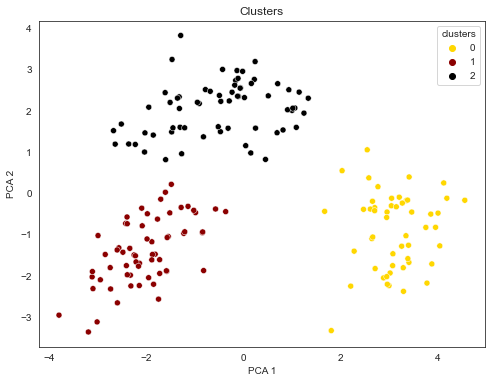

In [327]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=pca_dataframe, x="PCA 1", y="PCA 2", hue="clusters", palette=['#FFD700','#8B0000','#000000'])
plt.title('Clusters')
plt.show()


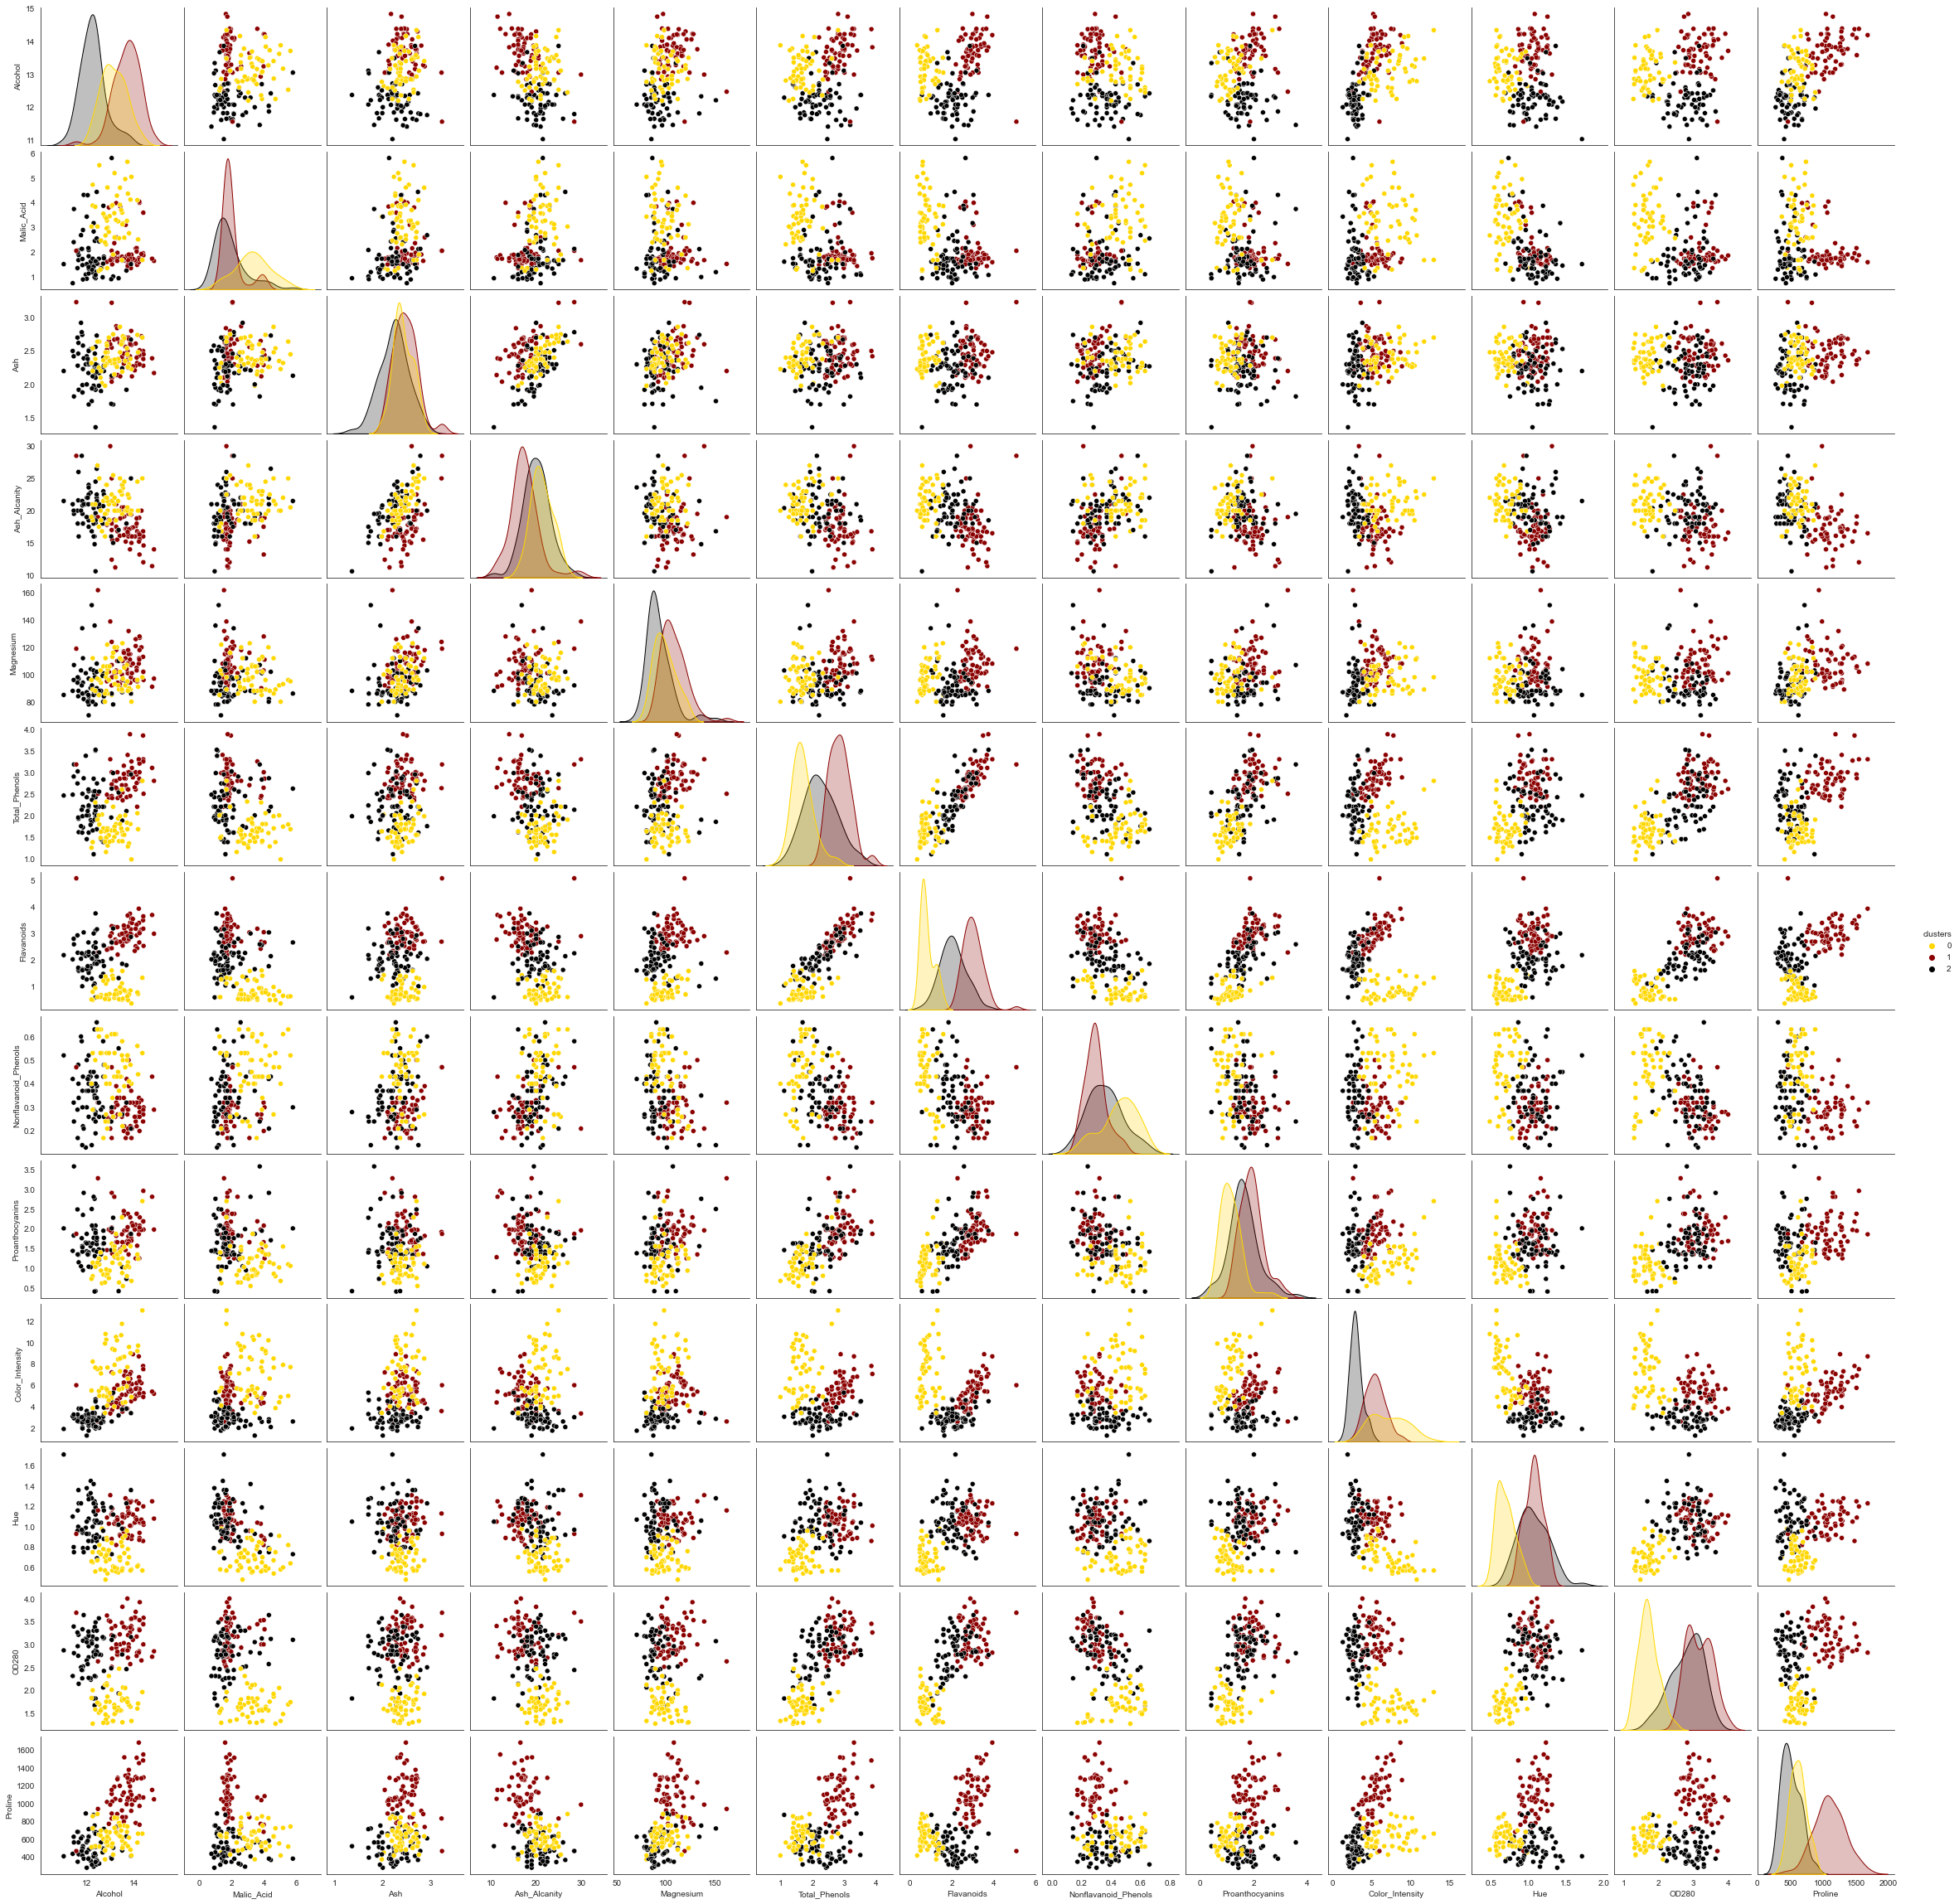

In [328]:
sns.pairplot(data, hue="clusters", palette=['#FFD700','#8B0000','#000000'])
plt.show()